In [25]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import sys
import json
import torch

import numpy as np
import pandas as pd

from PIL import Image

from tqdm.auto import tqdm

from matplotlib import pyplot
import seaborn as sns

from datetime import datetime

from sklearn.manifold import TSNE

In [8]:
from utils import get_score_from_embs

In [9]:
INPUT_DIR = '../kcg-ml-image-pipeline/output/environmental/ranking_v1/'
PMT_PATH = 'data/environmental/prompt.json'

# EMB_PATH = 'data/environmental/clip_text_emb.npz'
# WEIGHT_PATH = 'weight/004/environmental/clip_text.pt'

EMB_PATH = 'data/environmental/clip_vision_emb.npz'
WEIGHT_PATH = 'weight/004/environmental/clip_vision.pt'

BATCH_SIZE = 1024

In [ ]:
#

In [4]:
data = np.load(EMB_PATH, allow_pickle=True)

file_paths = data['file_paths']
file_paths = [i.split('_')[0] for i in file_paths]

path_to_index = {file_path: i for i, file_path in enumerate(file_paths)}

embeds = data['image_embeds']

In [5]:
js = json.load(open(PMT_PATH))

path_to_date = {item['file_path'].split('_')[0]: datetime.fromisoformat(item['creation_time']) for item in js.values()}

In [6]:
datetimes = list(map(path_to_date.get, file_paths))

In [ ]:
#

In [10]:
model = torch.nn.Linear(embeds.shape[-1], 1, bias=True).cuda().eval()

In [11]:
model.load_state_dict(torch.load(WEIGHT_PATH))

<All keys matched successfully>

In [13]:
scores = get_score_from_embs(embeds.astype('float32'), model, BATCH_SIZE)

  0%|          | 0/75 [00:00<?, ?it/s]

In [38]:
x, y, indices = zip(*[(x, y, i) for i, (x, y) in enumerate(zip(datetimes, scores)) if x is not None])

Text(0.5, 1.0, 'vision score of images in ranking')

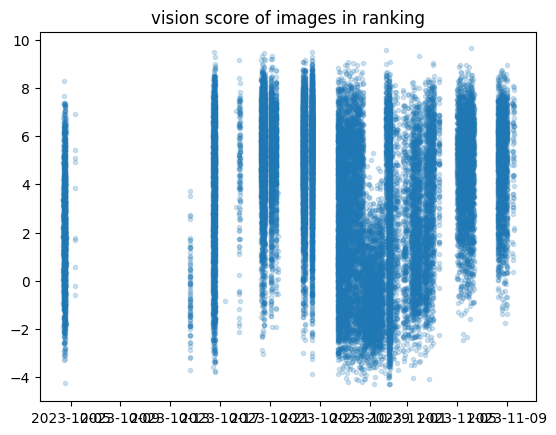

In [62]:
pyplot.plot(x, y, '.', alpha=0.2)
pyplot.title('vision score of images in ranking')

# vis

In [34]:
tsne = TSNE(2, n_jobs=-1)

In [46]:
z = tsne.fit_transform(embeds[list(indices)])

<Axes: >

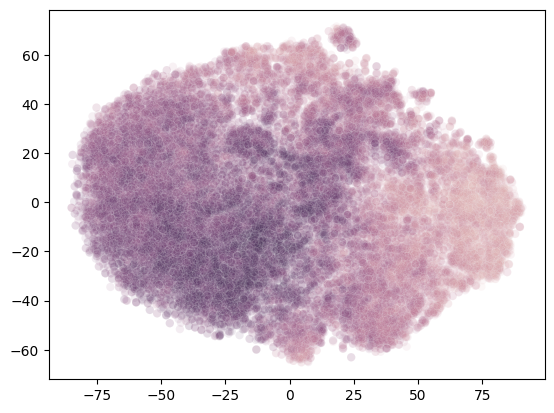

In [58]:
sns.scatterplot(x=z[..., 0], y=z[..., 1], hue=y, legend=None, alpha=0.1)